In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score,f1_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
diabetes_data = pd.read_csv('diabetes.csv')

In [3]:
diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.shape

(768, 9)

In [5]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Visualising** the data using multiple types of plot function

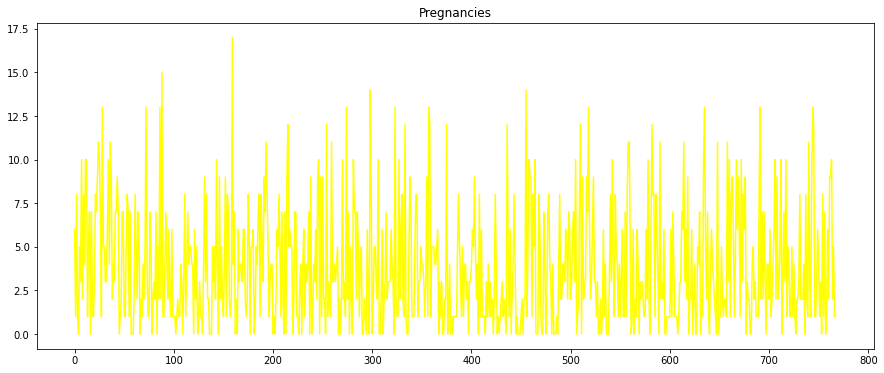

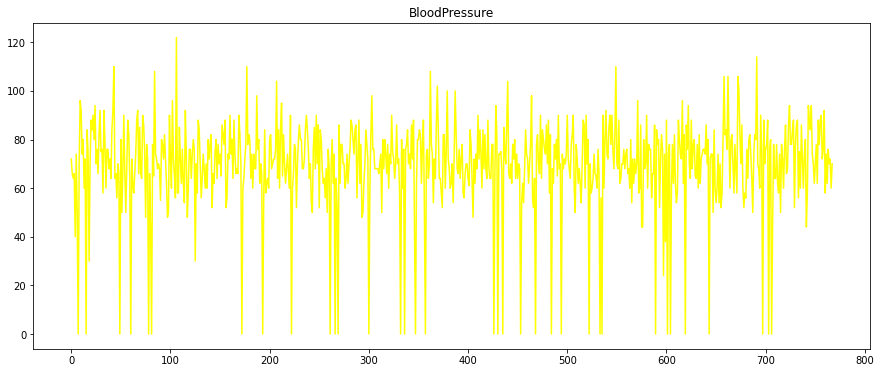

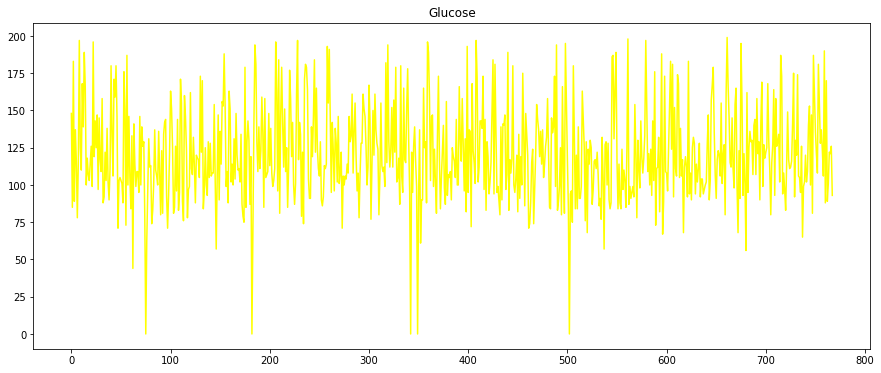

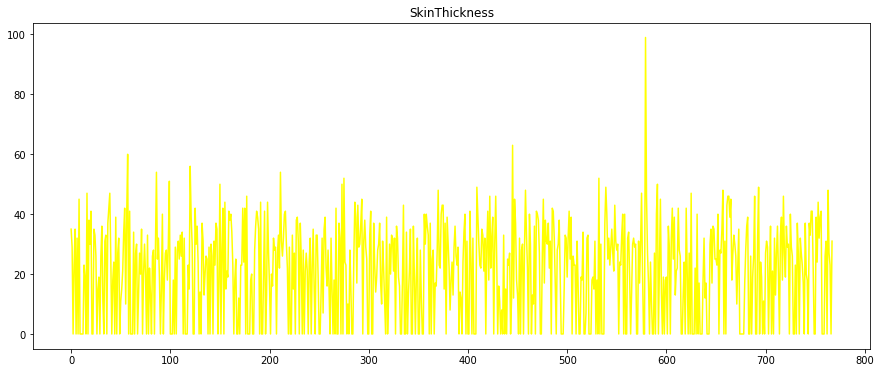

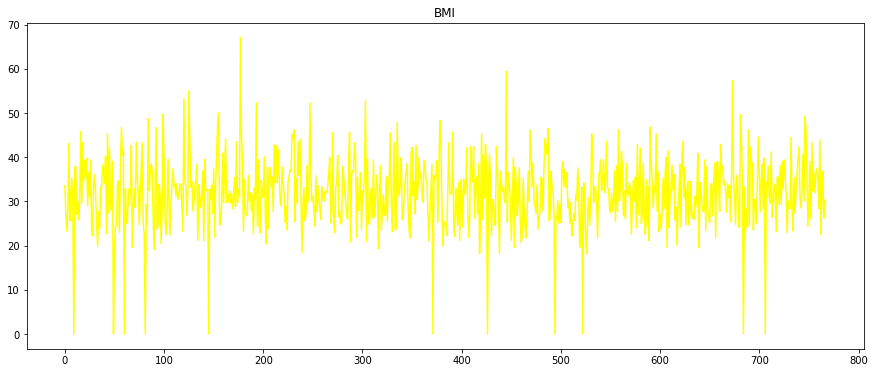

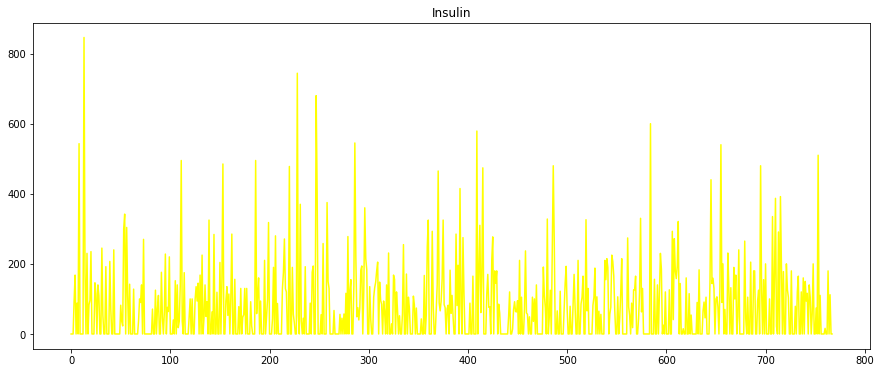

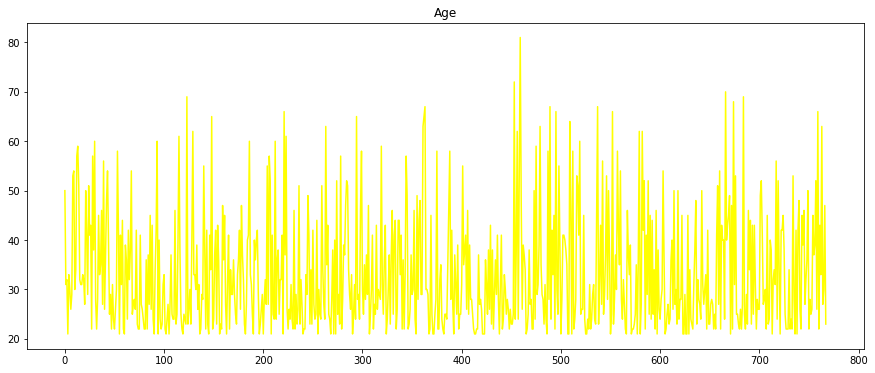

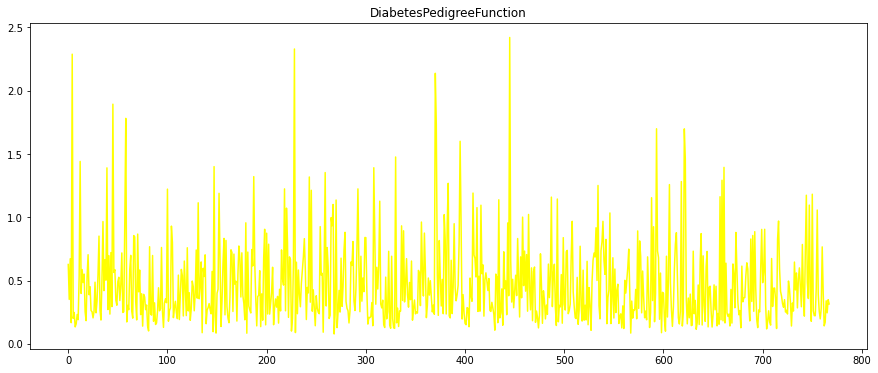

In [7]:

def Plot(feature):
  fig = plt.figure()
  fig.set_figwidth(15)
  fig.set_figheight(6)
  plt.title(feature)
  plt.plot(diabetes_data[feature],color='yellow')
  plt.show()


Plot('Pregnancies')
Plot('BloodPressure')
Plot('Glucose')
Plot('SkinThickness')
Plot('BMI')
Plot('Insulin')
Plot('Age')
Plot('DiabetesPedigreeFunction')

**Heat Map**

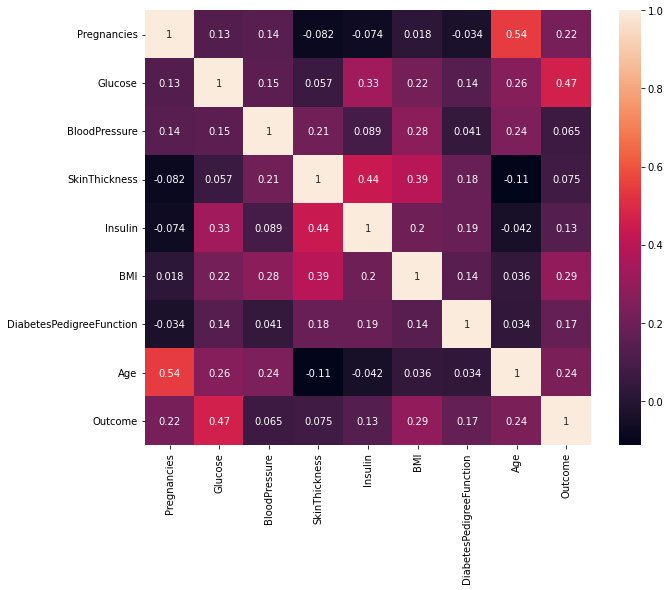

In [8]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(diabetes_data.corr(), annot=True, ax=ax)

**Count Plot**

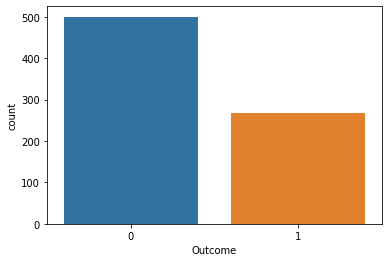

In [9]:
sns.countplot(x=diabetes_data.Outcome)

**Distribution Plot**

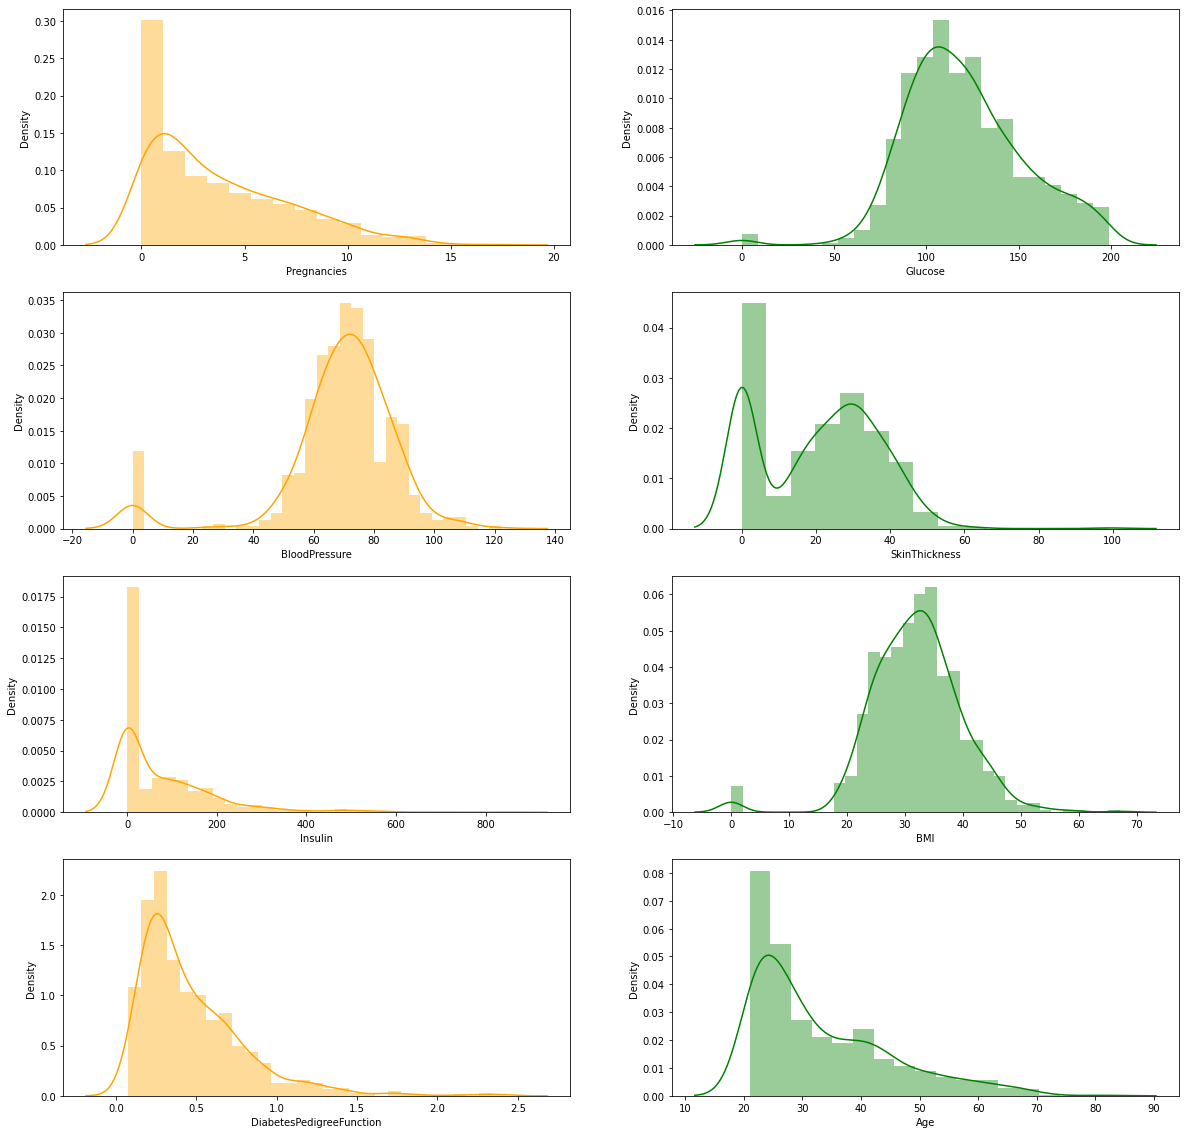

In [10]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.distplot(diabetes_data.Pregnancies, ax=axes[0,0],color='Orange')
sns.distplot(diabetes_data.Glucose, ax=axes[0,1],color='Green')
sns.distplot(diabetes_data.BloodPressure, ax=axes[1,0],color='Orange')
sns.distplot(diabetes_data.SkinThickness, ax=axes[1,1],color='Green')
sns.distplot(diabetes_data.Insulin, ax=axes[2,0],color='Orange')
sns.distplot(diabetes_data.BMI, ax=axes[2,1],color='Green')
sns.distplot(diabetes_data.DiabetesPedigreeFunction, ax=axes[3,0],color='Orange')
sns.distplot(diabetes_data.Age, ax=axes[3,1],color='Green')

**Histogram**

Text(0.5, 1.0, 'Diabetes\xa0Patient')

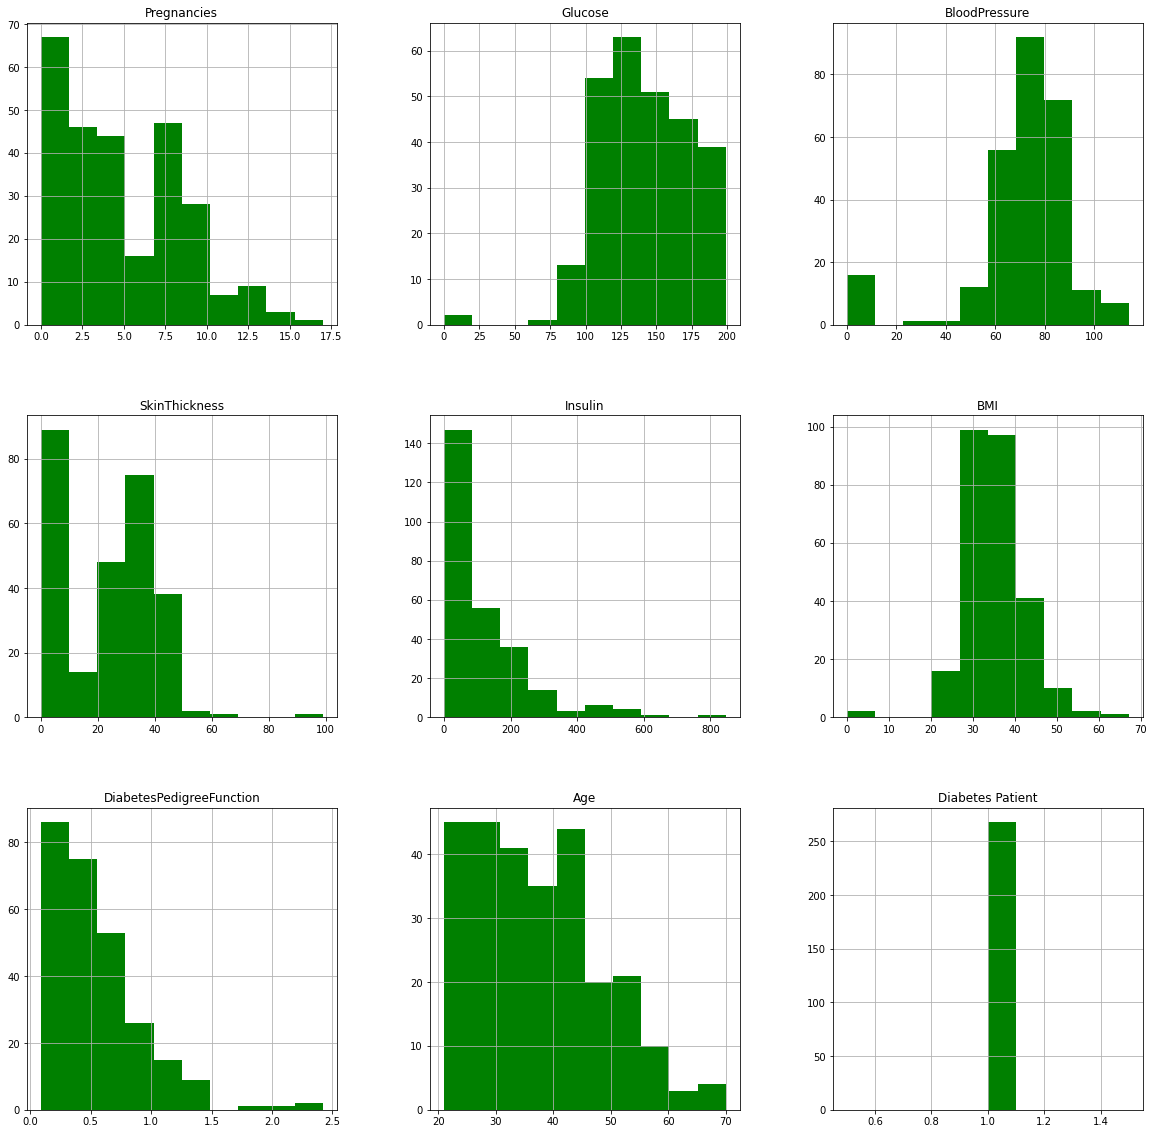

In [11]:
p = diabetes_data[diabetes_data['Outcome']==1].hist(figsize = (20,20),color='Green')
plt.title('Diabetes Patient')

**PairPlot**

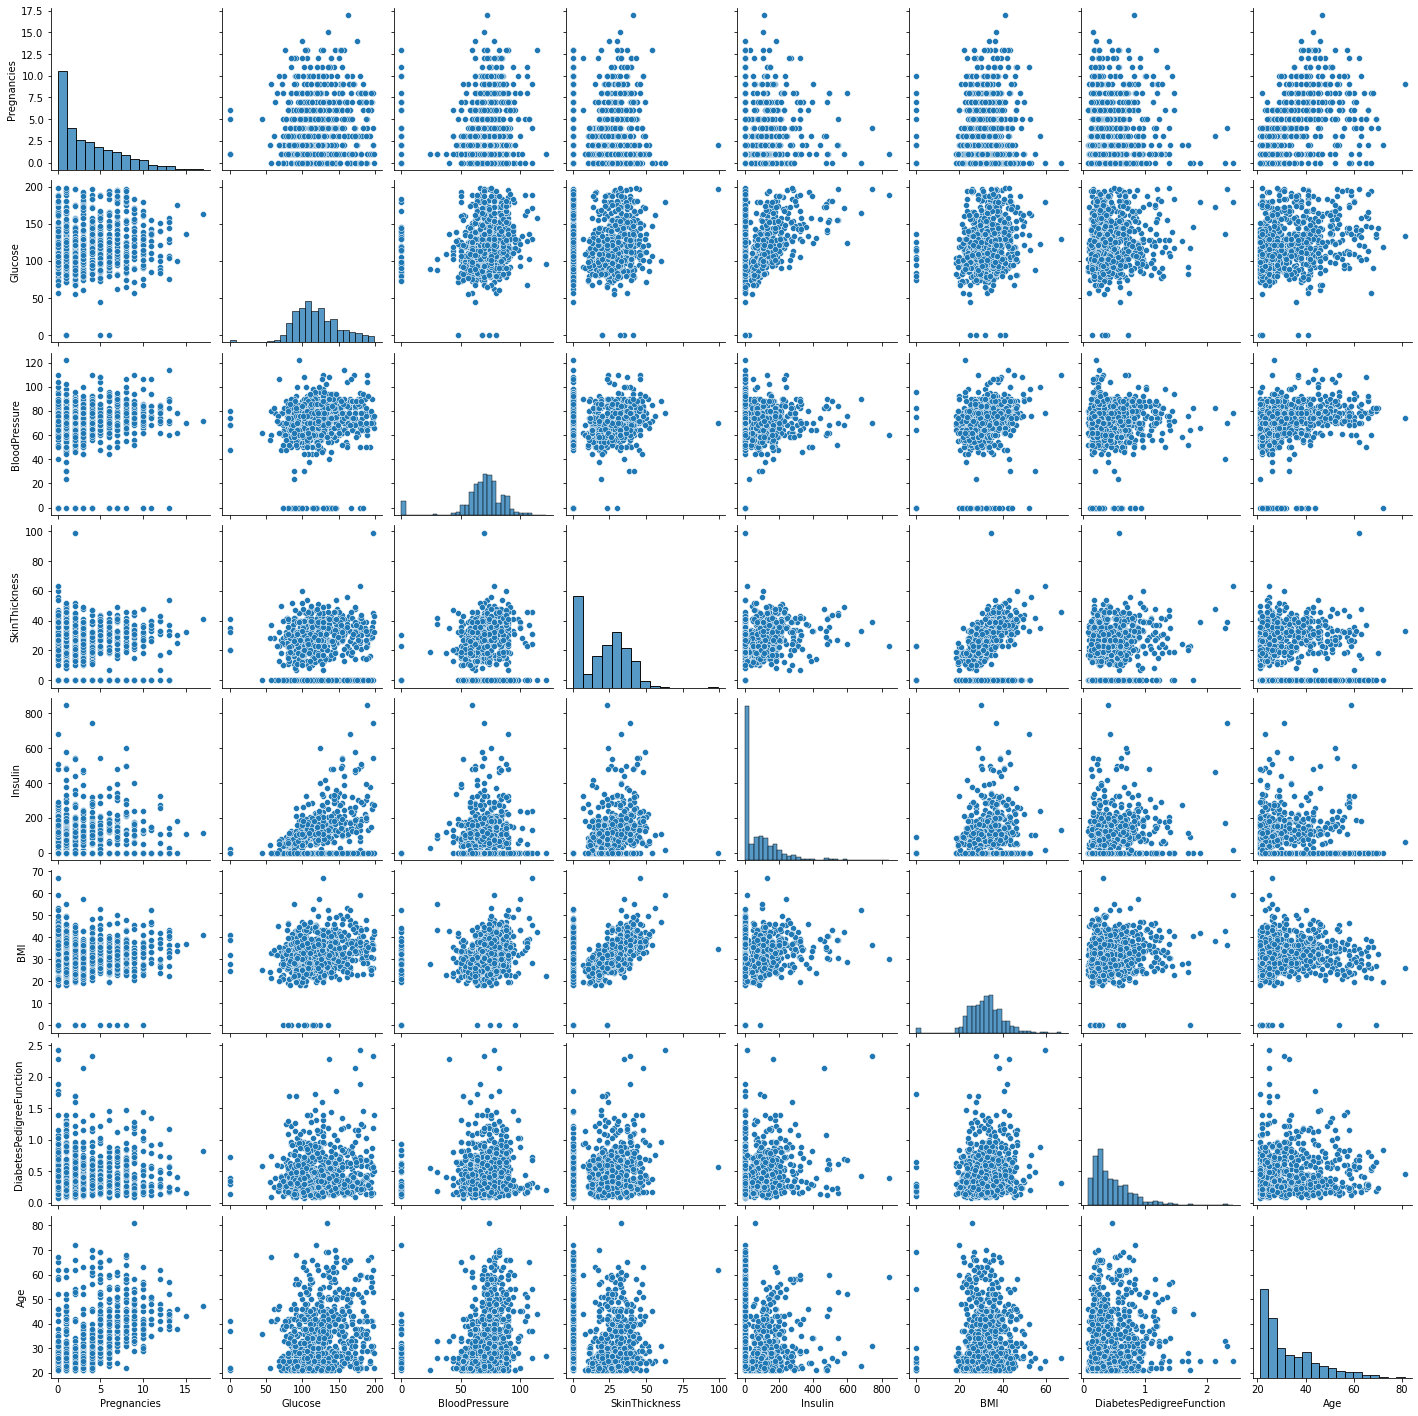

In [12]:
sns.pairplot(diabetes_data.drop('Outcome',axis=1))

In [13]:
diabetes_data_columns = diabetes_data.columns

In [14]:
predictors = diabetes_data[diabetes_data_columns[diabetes_data_columns != 'Outcome']] # all columns except Outcome
target = diabetes_data['Outcome']

In [15]:
n_cols = predictors.shape[1]
n_cols 

8

**Spliting data into Training and Testing sets. Test set contain 25 % of the original data.**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25)

In [17]:
norm = Normalizer()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

X_train,X_test

(array([[0.02728163, 0.80480821, 0.4774286 , ..., 0.30350818, 0.00616565,
         0.17733062],
        [0.07430076, 0.69842713, 0.53496546, ..., 0.17163475, 0.0044209 ,
         0.41608425],
        [0.08995536, 0.69510963, 0.60515427, ..., 0.24615059, 0.00245333,
         0.28622161],
        ...,
        [0.00586624, 0.69221656, 0.34024204, ..., 0.19534586, 0.00153109,
         0.13492357],
        [0.01622404, 0.        , 0.77875406, ..., 0.40073386, 0.00227137,
         0.35692895],
        [0.01466901, 0.8214647 , 0.48407742, ..., 0.18336266, 0.00225169,
         0.17602815]]),
 array([[5.62980086e-03, 8.10691325e-01, 4.61643671e-01, ...,
         2.32510776e-01, 3.41728912e-03, 1.57634424e-01],
        [1.10377412e-02, 6.36509742e-01, 2.86981271e-01, ...,
         1.24358551e-01, 3.56886965e-03, 1.14056659e-01],
        [1.14711326e-03, 2.16804406e-01, 6.88267955e-02, ...,
         3.45281091e-02, 4.56551077e-04, 6.76796822e-02],
        ...,
        [0.00000000e+00, 5.44473456e

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense

**NN should contain two hidden layers. 
Both the hidden layers use “ sigmoid activation function”.Number of hidden units in first and second hidden layers are 512 and 128 respectively.
The output layer uses softmax activation functions. 
Batch size is 32 and number of epochs are set to 1000. 
Take initial learning rate as 0.005.**

In [19]:
def neuralnetwork(lr):
  model = Sequential()
  layer1 = Dense(units=512,activation='sigmoid', input_dim =n_cols)
  model.add(layer1)
  model.add(Dense(units=128,activation='sigmoid'))
  model.add(Dense(units=1,activation='softmax'))
  optimizer = keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics = ['accuracy'])
  return model;

** Accuracy And Classification Report function**

In [20]:
def Report():
  X = [X_train, X_test]
  Y = [y_train, y_test]
  for i,(x,y) in enumerate(zip(X, Y)):
      y_pred = model.predict(x)
      y_pred = np.around(y_pred)
      y_pred = np.asarray(y_pred)
      if i == 0:
          print('Training set:')
          print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                    classification_report(y, y_pred)))
          print(f1_score(y, y_pred, average="weighted", labels=np.unique(y_pred), zero_division=0))
      
      else:
          print('Test set:')
          print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                    classification_report(y, y_pred)))
          print(f1_score(y, y_pred, average="weighted", labels=np.unique(y_pred), zero_division=0))
      scores = model.evaluate(X_train,y_train)
      print("\n %s: %.2f%% " %(model.metrics_names[1],scores[1]*100))

**Testing for learning rate 0.005**

In [21]:
model = neuralnetwork(0.005)
model.fit(X_train,y_train,epochs=1000,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/1000
18/18 [==============================] - 1s 11ms/step - loss: 0.7163 - accuracy: 0.3524 - val_loss: 0.6449 - val_accuracy: 0.3385
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6588 - accuracy: 0.3524 - val_loss: 0.6523 - val_accuracy: 0.3385
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.3524 - val_loss: 0.6410 - val_accuracy: 0.3385
Epoch 4/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.3524 - val_loss: 0.6431 - val_accuracy: 0.3385
Epoch 5/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6599 - accuracy: 0.3524 - val_loss: 0.6454 - val_accuracy: 0.3385
Epoch 6/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.3524 - val_loss: 0.6463 - val_accuracy: 0.3385
Epoch 7/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6599 - accuracy: 0.3524 - val_loss: 0.6402 - val_accuracy: 0.3385
Epoch

**Accuracy and Classification report**

In [22]:
Report()

18/18 [==============================] - 0s 1ms/step
Training set:
	Accuracy:0.352
	Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       373
           1       0.35      1.00      0.52       203

    accuracy                           0.35       576
   macro avg       0.18      0.50      0.26       576
weighted avg       0.12      0.35      0.18       576

0.521181001283697
18/18 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.3524

 accuracy: 35.24% 
6/6 [==============================] - 0s 2ms/step
Test set:
	Accuracy:0.339
	Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.34      1.00      0.51        65

    accuracy                           0.34       192
   macro avg       0.17      0.50      0.25       192
weighted avg       0.11      0.34      0.17       192

0.5058365758754

**Testing for Batch size 16**

In [23]:
model = neuralnetwork(0.005)
model.fit(X_train,y_train,epochs=1000,batch_size=16,validation_data=(X_test,y_test))




Epoch 1/1000
36/36 [==============================] - 0s 5ms/step - loss: 0.7152 - accuracy: 0.3524 - val_loss: 0.7335 - val_accuracy: 0.3385
Epoch 2/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.3524 - val_loss: 0.6408 - val_accuracy: 0.3385
Epoch 3/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.3524 - val_loss: 0.6420 - val_accuracy: 0.3385
Epoch 4/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.3524 - val_loss: 0.6437 - val_accuracy: 0.3385
Epoch 5/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.6516 - accuracy: 0.3524 - val_loss: 0.6402 - val_accuracy: 0.3385
Epoch 6/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.3524 - val_loss: 0.6407 - val_accuracy: 0.3385
Epoch 7/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.3524 - val_loss: 0.6502 - val_accuracy: 0.3385
Epoch 

**Accuracy and Classification report**

In [24]:
Report()


18/18 [==============================] - 0s 1ms/step
Training set:
	Accuracy:0.352
	Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       373
           1       0.35      1.00      0.52       203

    accuracy                           0.35       576
   macro avg       0.18      0.50      0.26       576
weighted avg       0.12      0.35      0.18       576

0.521181001283697
18/18 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.3524

 accuracy: 35.24% 
6/6 [==============================] - 0s 2ms/step
Test set:
	Accuracy:0.339
	Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.34      1.00      0.51        65

    accuracy                           0.34       192
   macro avg       0.17      0.50      0.25       192
weighted avg       0.11      0.34      0.17       192

0.5058365758754

**Testing for Batch size 48**

In [25]:
model = neuralnetwork(0.005)
model.fit(X_train,y_train,epochs=1000,batch_size=48,validation_data=(X_test,y_test))

Epoch 1/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.9899 - accuracy: 0.3524 - val_loss: 0.7598 - val_accuracy: 0.3385
Epoch 2/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.3524 - val_loss: 0.6457 - val_accuracy: 0.3385
Epoch 3/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6553 - accuracy: 0.3524 - val_loss: 0.6464 - val_accuracy: 0.3385
Epoch 4/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.6544 - accuracy: 0.3524 - val_loss: 0.6403 - val_accuracy: 0.3385
Epoch 5/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.6491 - accuracy: 0.3524 - val_loss: 0.6426 - val_accuracy: 0.3385
Epoch 6/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.6493 - accuracy: 0.3524 - val_loss: 0.6402 - val_accuracy: 0.3385
Epoch 7/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.3524 - val_loss: 0.6408 - val_accuracy: 0.3385
Epoch

**Accuracy and Classification report**

In [26]:
Report()

18/18 [==============================] - 0s 1ms/step
Training set:
	Accuracy:0.352
	Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       373
           1       0.35      1.00      0.52       203

    accuracy                           0.35       576
   macro avg       0.18      0.50      0.26       576
weighted avg       0.12      0.35      0.18       576

0.521181001283697
18/18 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.3524

 accuracy: 35.24% 
6/6 [==============================] - 0s 2ms/step
Test set:
	Accuracy:0.339
	Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.34      1.00      0.51        65

    accuracy                           0.34       192
   macro avg       0.17      0.50      0.25       192
weighted avg       0.11      0.34      0.17       192

0.5058365758754

**Testing for Learning rate 0.01**

In [27]:
model = neuralnetwork(0.01)
model.fit(X_train,y_train,epochs=1000,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.8056 - accuracy: 0.3524 - val_loss: 0.6400 - val_accuracy: 0.3385
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6512 - accuracy: 0.3524 - val_loss: 0.6410 - val_accuracy: 0.3385
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6507 - accuracy: 0.3524 - val_loss: 0.6672 - val_accuracy: 0.3385
Epoch 4/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6556 - accuracy: 0.3524 - val_loss: 0.6466 - val_accuracy: 0.3385
Epoch 5/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.3524 - val_loss: 0.6401 - val_accuracy: 0.3385
Epoch 6/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6604 - accuracy: 0.3524 - val_loss: 0.6447 - val_accuracy: 0.3385
Epoch 7/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6497 - accuracy: 0.3524 - val_loss: 0.6416 - val_accuracy: 0.3385
Epoch 

**Accuracy and Classification report**

In [28]:
Report()

18/18 [==============================] - 0s 1ms/step
Training set:
	Accuracy:0.352
	Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       373
           1       0.35      1.00      0.52       203

    accuracy                           0.35       576
   macro avg       0.18      0.50      0.26       576
weighted avg       0.12      0.35      0.18       576

0.521181001283697
18/18 [==============================] - 0s 1ms/step - loss: 0.3473 - accuracy: 0.3524

 accuracy: 35.24% 
6/6 [==============================] - 0s 2ms/step
Test set:
	Accuracy:0.339
	Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.34      1.00      0.51        65

    accuracy                           0.34       192
   macro avg       0.17      0.50      0.25       192
weighted avg       0.11      0.34      0.17       192

0.5058365758754

**Testing for Learning rate 0.001**

In [29]:
model = neuralnetwork(0.001)
model.fit(X_train,y_train,epochs=1000,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.7535 - accuracy: 0.3524 - val_loss: 0.7483 - val_accuracy: 0.3385
Epoch 2/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6814 - accuracy: 0.3524 - val_loss: 0.6402 - val_accuracy: 0.3385
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6580 - accuracy: 0.3524 - val_loss: 0.6475 - val_accuracy: 0.3385
Epoch 4/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6546 - accuracy: 0.3524 - val_loss: 0.6470 - val_accuracy: 0.3385
Epoch 5/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6548 - accuracy: 0.3524 - val_loss: 0.6398 - val_accuracy: 0.3385
Epoch 6/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6494 - accuracy: 0.3524 - val_loss: 0.6479 - val_accuracy: 0.3385
Epoch 7/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.3524 - val_loss: 0.6401 - val_accuracy: 0.3385
Epoch 

**Accuracy and Classification report**

In [30]:
Report()

18/18 [==============================] - 0s 1ms/step
Training set:
	Accuracy:0.352
	Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       373
           1       0.35      1.00      0.52       203

    accuracy                           0.35       576
   macro avg       0.18      0.50      0.26       576
weighted avg       0.12      0.35      0.18       576

0.521181001283697
18/18 [==============================] - 0s 1ms/step - loss: 0.5522 - accuracy: 0.3524

 accuracy: 35.24% 
6/6 [==============================] - 0s 2ms/step
Test set:
	Accuracy:0.339
	Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.34      1.00      0.51        65

    accuracy                           0.34       192
   macro avg       0.17      0.50      0.25       192
weighted avg       0.11      0.34      0.17       192

0.5058365758754